In [1]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\Work_From_Anywhere_Salary_Data.csv")

In [3]:
df.head()

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Salary (Annual),Currency,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,155200.11,AUD,1.3,7,"Python, SQL",Stock Options,0.47
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,91026.49,INR,9.1,1,"C#, .NET",Gym Membership,2.68
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,41824.38,EUR,11.6,2,"JavaScript, React",Stock Options,1.90
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,143929.78,USD,9.1,3,"Go, Kubernetes",Health Insurance,0.82


In [4]:

print("Data Shape: ", df.shape)


Data Shape:  (500, 14)


In [5]:

print("DATA information")
print(df.info())


DATA information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company                        500 non-null    object 
 1   Job Title                      500 non-null    object 
 2   Industry                       500 non-null    object 
 3   Location                       500 non-null    object 
 4   Employment Type                500 non-null    object 
 5   Experience Level               500 non-null    object 
 6   Remote Flexibility             500 non-null    object 
 7   Salary (Annual)                500 non-null    float64
 8   Currency                       500 non-null    object 
 9   Years of Experience            500 non-null    float64
 10  Job Satisfaction Score (1-10)  500 non-null    int64  
 11  Tech Stack                     500 non-null    object 
 12  Perks                          50

In [6]:
print("Total Null values")
print(df.isnull().sum())


Total Null values
Company                          0
Job Title                        0
Industry                         0
Location                         0
Employment Type                  0
Experience Level                 0
Remote Flexibility               0
Salary (Annual)                  0
Currency                         0
Years of Experience              0
Job Satisfaction Score (1-10)    0
Tech Stack                       0
Perks                            0
Last Promotion (Years Ago)       0
dtype: int64


In [7]:

print("dublicated Row sum:",df.duplicated().sum())

dublicated Row sum: 0


In [8]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Value counts for Company:
 Company
IBM           58
Meta          55
Tesla         54
Adobe         52
Salesforce    52
Amazon        50
Apple         49
Netflix       49
Microsoft     41
Google        40
Name: count, dtype: int64

Value counts for Job Title:
 Job Title
UX Designer          92
DevOps Engineer      88
Data Analyst         87
Product Manager      85
Software Engineer    76
Data Scientist       72
Name: count, dtype: int64

Value counts for Industry:
 Industry
Retail        100
Media          91
Education      83
Tech           77
Finance        76
Healthcare     73
Name: count, dtype: int64

Value counts for Location:
 Location
Chicago          89
Remote           72
New York         71
Boston           70
Austin           69
San Francisco    66
Seattle          63
Name: count, dtype: int64

Value counts for Employment Type:
 Employment Type
Contract      127
Part-time     126
Full-time     124
Internship    123
Name: count, dtype: int64

Value counts for Experience Lev

In [9]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])
print(numerical_df.head())


   Salary (Annual)  Years of Experience  Job Satisfaction Score (1-10)  \
0        155200.11                  1.3                              7   
1        106365.54                 12.1                              1   
2         91026.49                  9.1                              1   
3         41824.38                 11.6                              2   
4        143929.78                  9.1                              3   

   Last Promotion (Years Ago)  
0                        0.47  
1                        1.70  
2                        2.68  
3                        1.90  
4                        0.82  


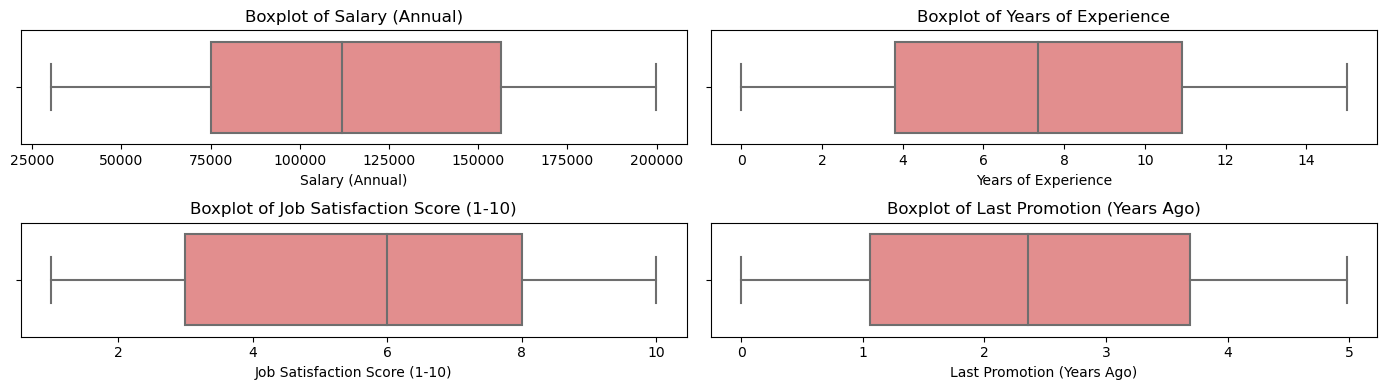

In [10]:
plt.figure(figsize=(14, 4))
for i, col in enumerate(numerical_df, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [11]:

numerical_df = df.select_dtypes(include=['number'])

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to all numerical columns
for col in numerical_df.columns:
    outliers = detect_outliers_iqr(numerical_df, col)
    print(f"{col}: {len(outliers)} outliers")


Salary (Annual): 0 outliers
Years of Experience: 0 outliers
Job Satisfaction Score (1-10): 0 outliers
Last Promotion (Years Ago): 0 outliers


 # EDA

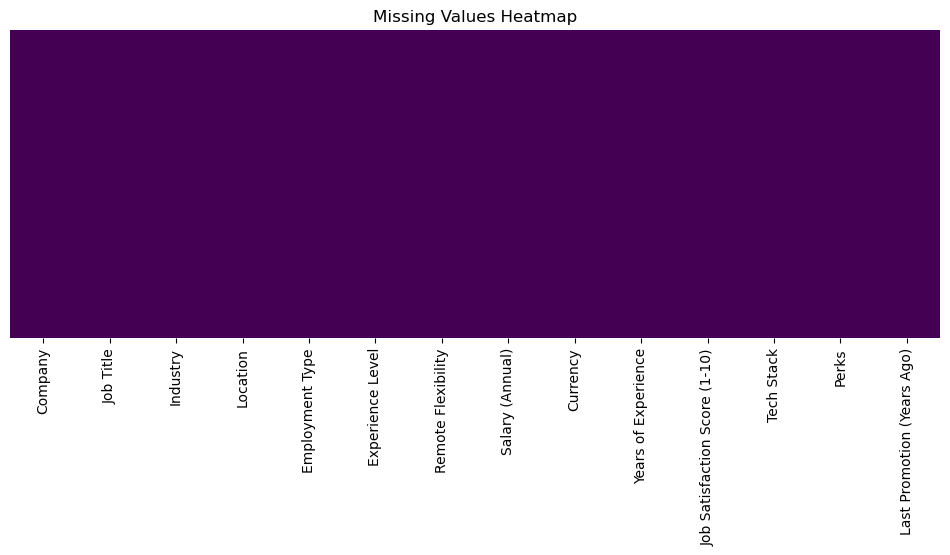

In [12]:
# checking null values using heatmap
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

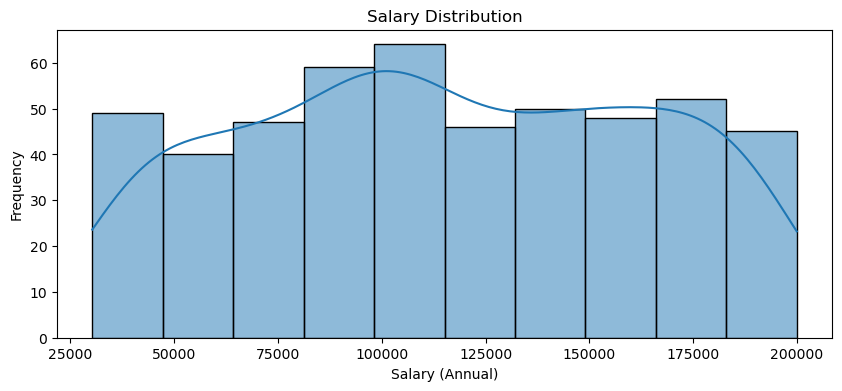

In [13]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Salary (Annual)'], kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary (Annual)")
plt.ylabel("Frequency")
plt.show()


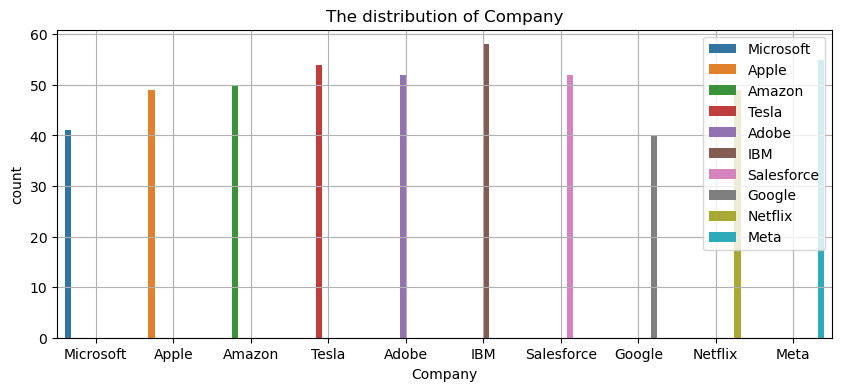

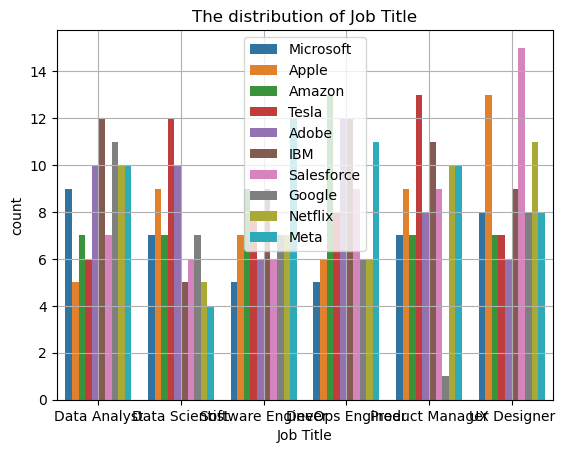

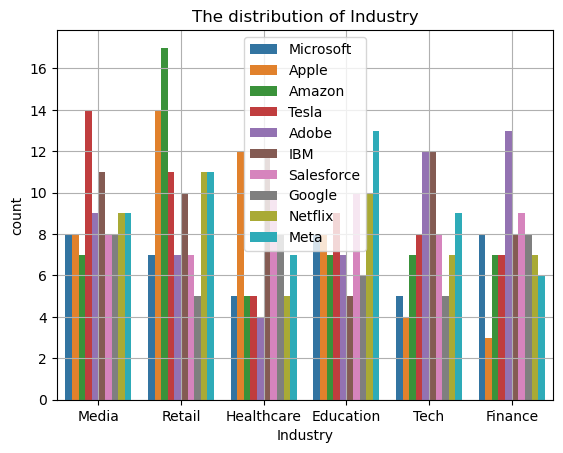

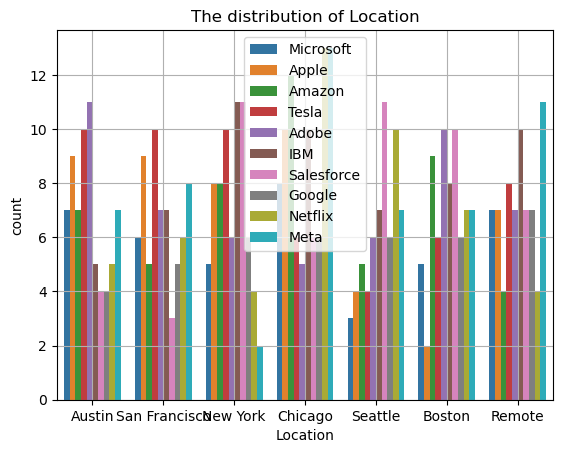

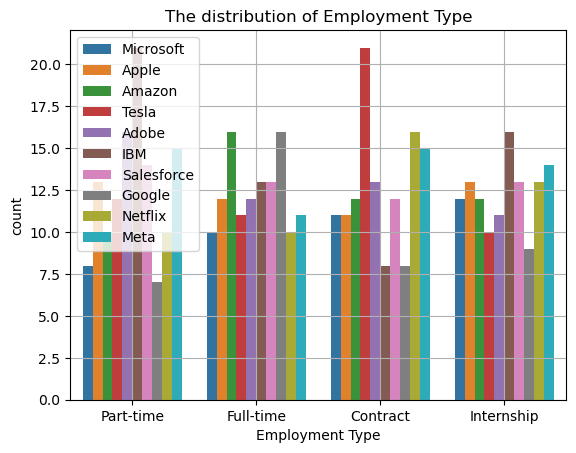

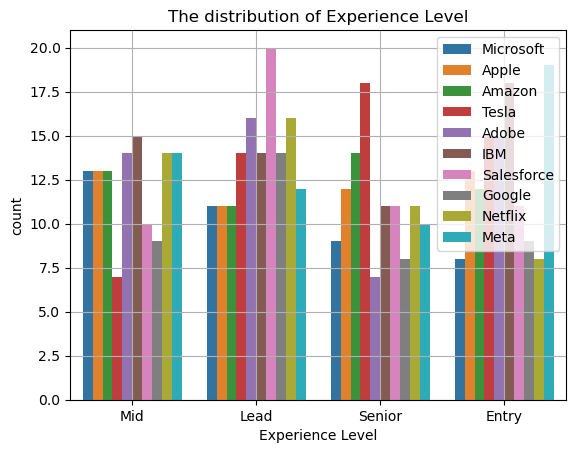

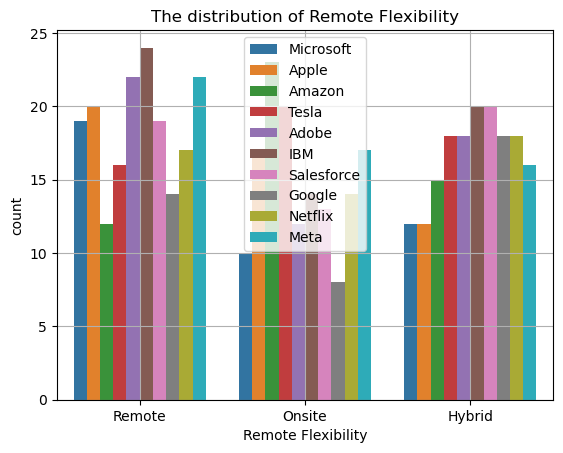

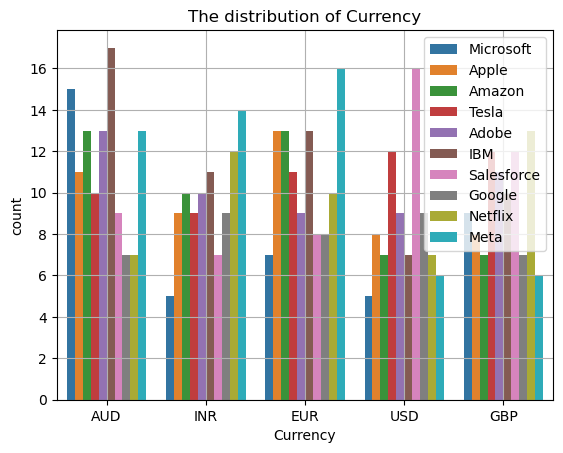

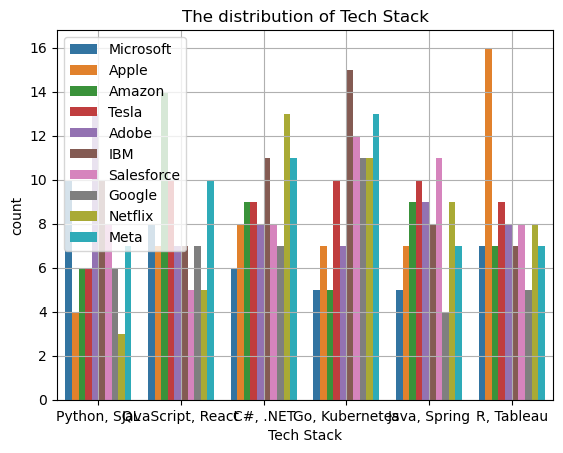

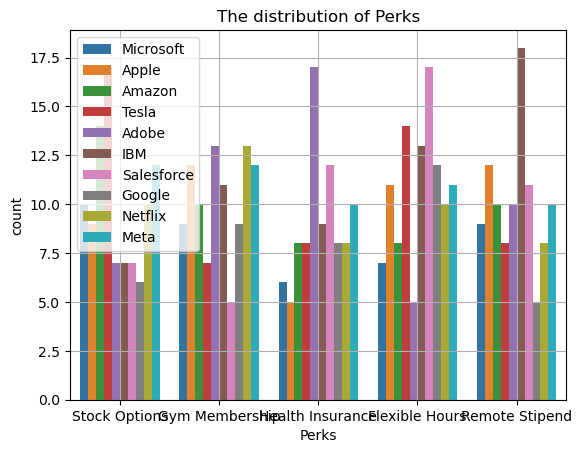

In [14]:
category_col =df.select_dtypes(include='object').columns 

plt.figure(figsize=(10,4))
for col in category_col:
    sns.countplot(x=col,data=df,hue='Company')
    plt.title(f'The distribution of {col}')
    plt.grid(True)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


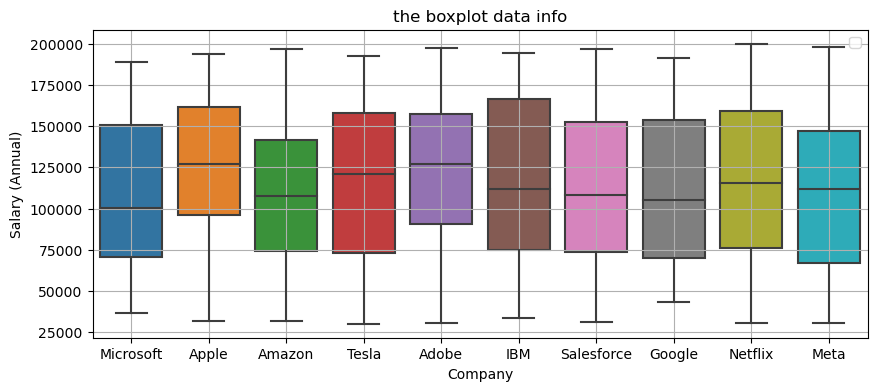

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Company',y='Salary (Annual)',data=df)
plt.title('the boxplot data info')
plt.grid(True)
plt.legend()
plt.show()

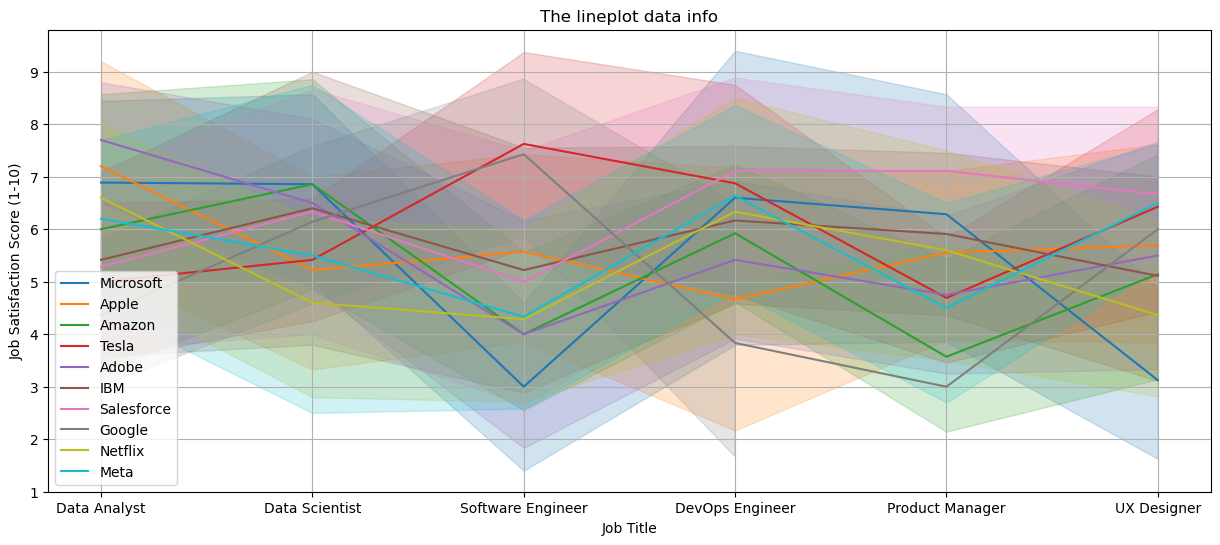

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Job Title',y='Job Satisfaction Score (1-10)',data=df,hue='Company')
plt.title('The lineplot data info')
plt.grid(True)
plt.legend()
plt.show()

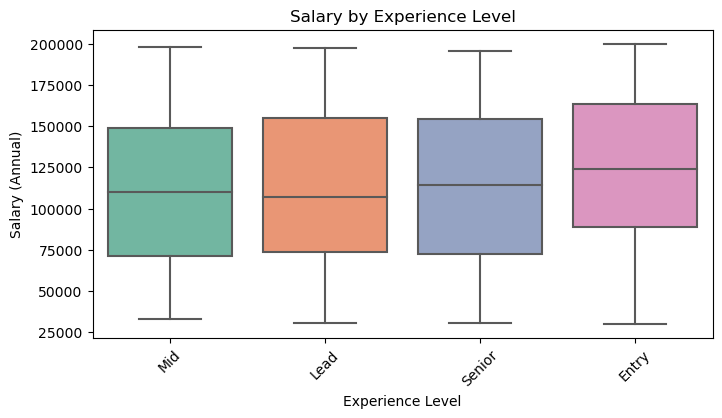

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Experience Level', y='Salary (Annual)', palette='Set2')
plt.title("Salary by Experience Level")
plt.xticks(rotation=45)
plt.show()


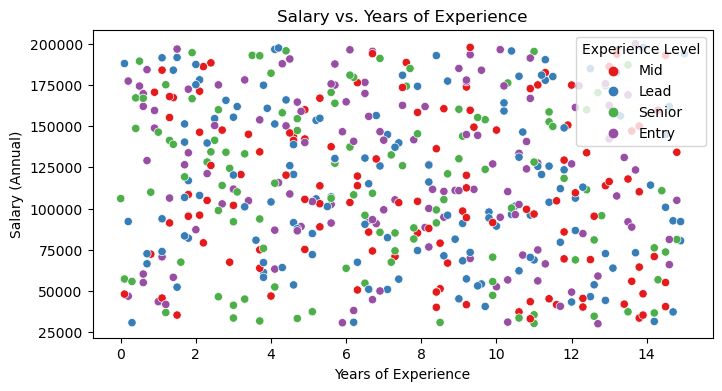

In [18]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Years of Experience', y='Salary (Annual)', hue='Experience Level', palette='Set1')
plt.title("Salary vs. Years of Experience")
plt.show()


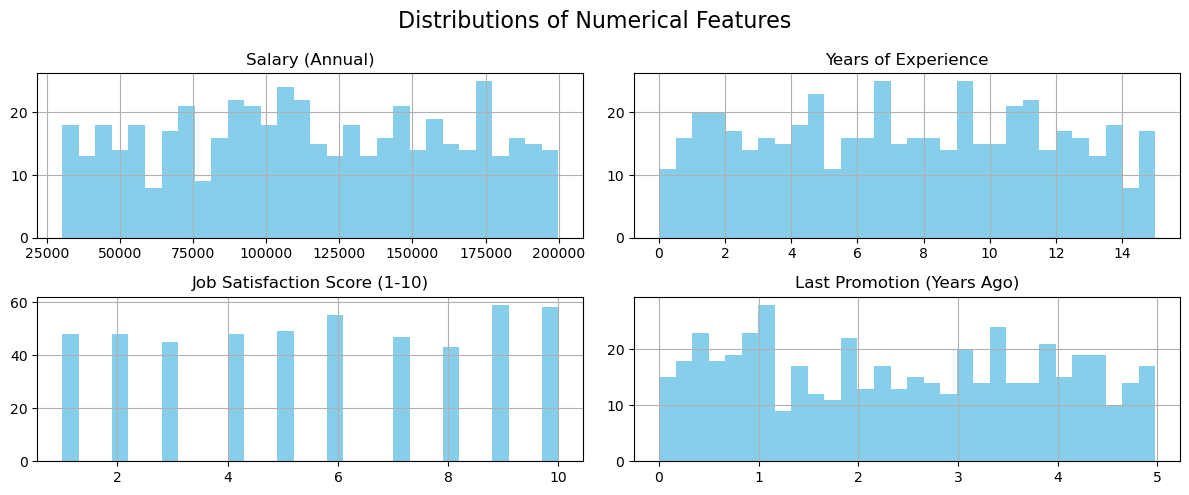

In [19]:
num_cols = df.select_dtypes(include='number').columns

# Histograms
df[num_cols].hist(bins=30, figsize=(12, 5), color='skyblue')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


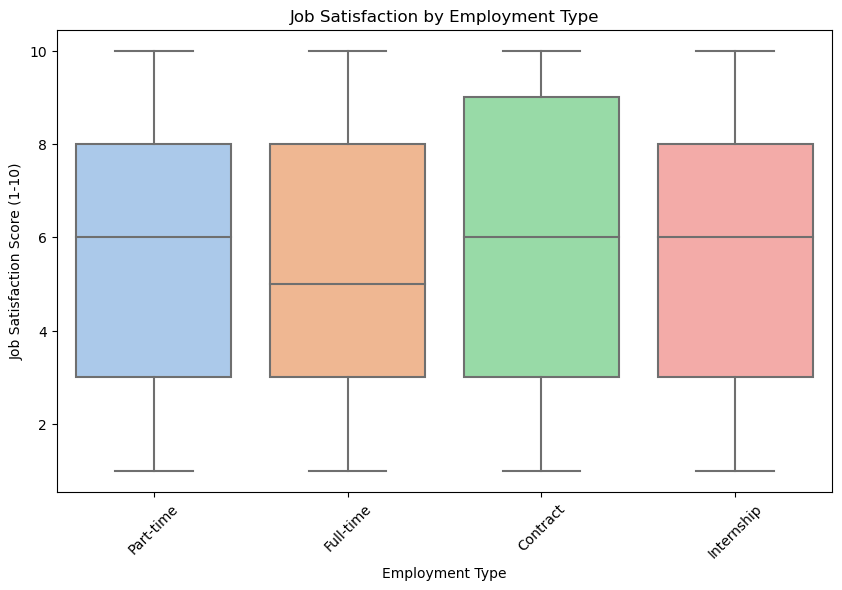

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Employment Type', y='Job Satisfaction Score (1-10)', palette='pastel')
plt.title("Job Satisfaction by Employment Type")
plt.xticks(rotation=45)
plt.show()


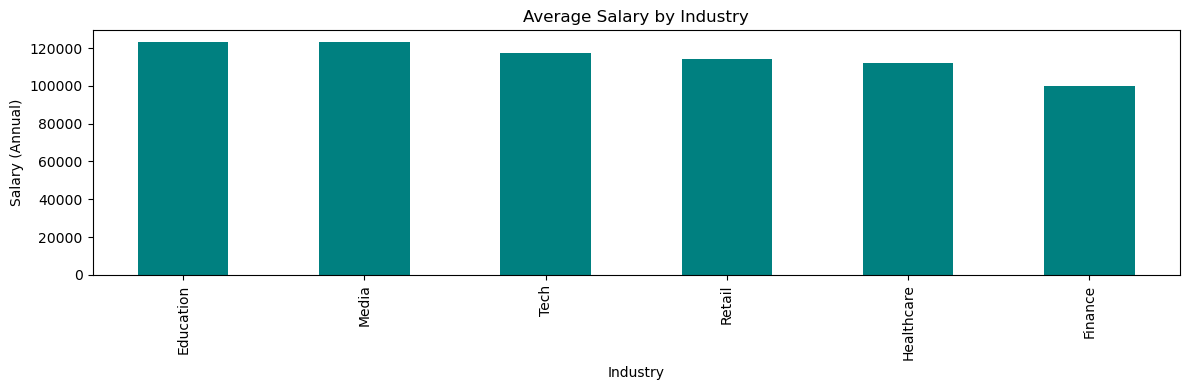

In [21]:
industry_salary = df.groupby('Industry')['Salary (Annual)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 4))
industry_salary.plot(kind='bar', color='teal')
plt.title("Average Salary by Industry")
plt.ylabel("Salary (Annual)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


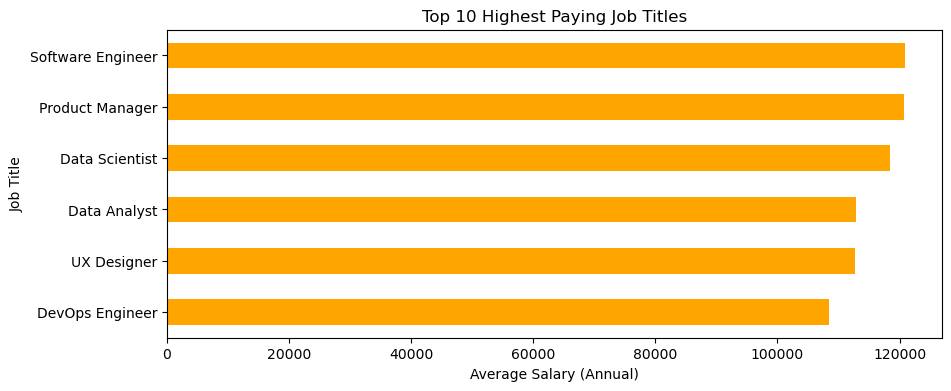

In [22]:
top_jobs = df.groupby('Job Title')['Salary (Annual)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
top_jobs.plot(kind='barh', color='orange')
plt.title("Top 10 Highest Paying Job Titles")
plt.xlabel("Average Salary (Annual)")
plt.gca().invert_yaxis()
plt.show()


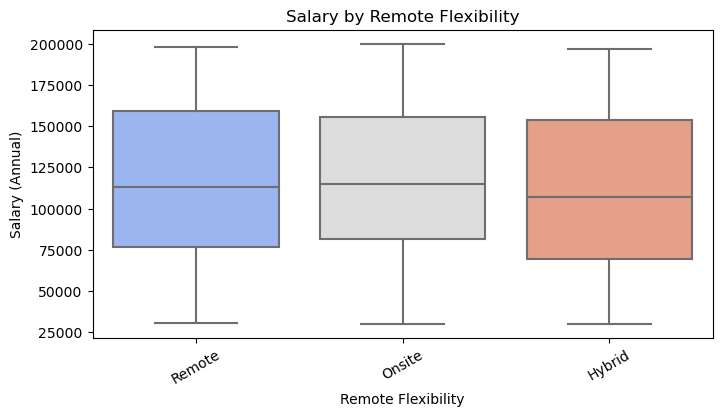

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Remote Flexibility', y='Salary (Annual)', palette='coolwarm')
plt.title("Salary by Remote Flexibility")
plt.xticks(rotation=30)
plt.show()


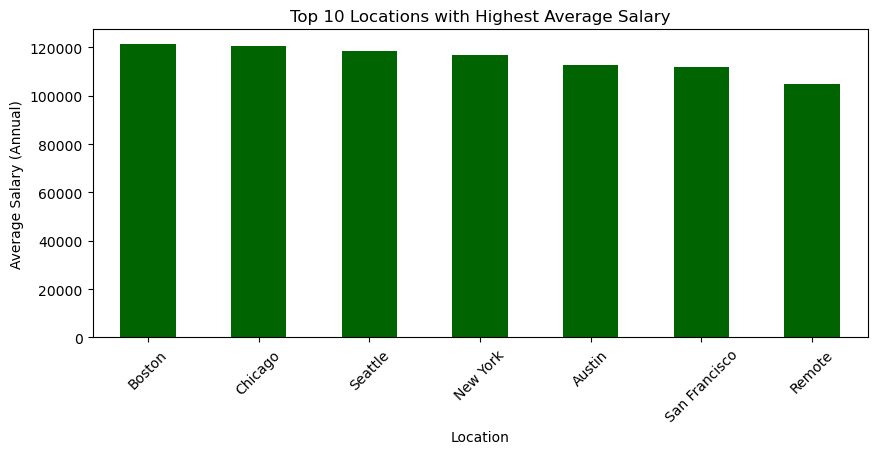

In [24]:
top_locations = df.groupby('Location')['Salary (Annual)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
top_locations.plot(kind='bar', color='darkgreen')
plt.title("Top 10 Locations with Highest Average Salary")
plt.ylabel("Average Salary (Annual)")
plt.xticks(rotation=45)
plt.show()


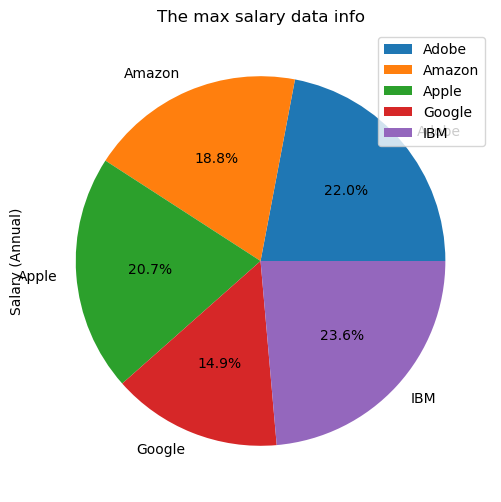

In [25]:
max_salary = df.groupby('Company')['Salary (Annual)'].sum().head(5)

plt.figure(figsize=(8,6))
max_salary.plot(kind='pie',autopct='%1.1f%%')
plt.title('The max salary data info')
plt.legend()
plt.show()

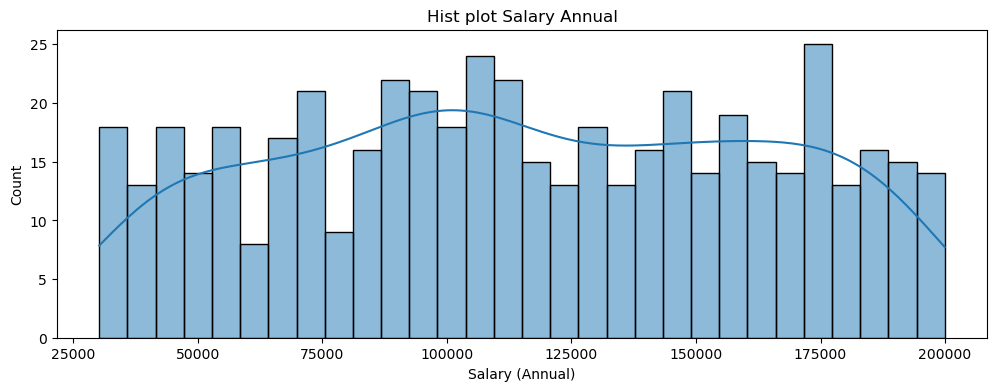

In [26]:
plt.figure(figsize=(12,4))
sns.histplot(x='Salary (Annual)', data=df, kde=True, bins=30)
plt.title("Hist plot Salary Annual")
plt.show()

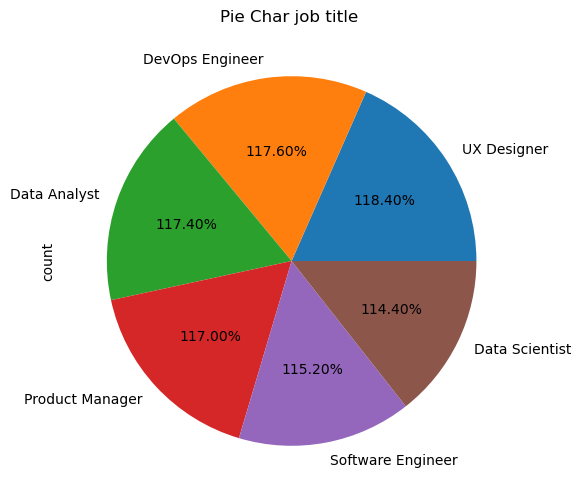

In [27]:
plt.figure(figsize=(12,6))
df['Job Title'].value_counts().plot(kind='pie', autopct='1%.2f%%')
plt.title("Pie Char job title ")
plt.show()

In [28]:
com_salary=df.groupby('Company')['Salary (Annual)'].mean().reset_index()

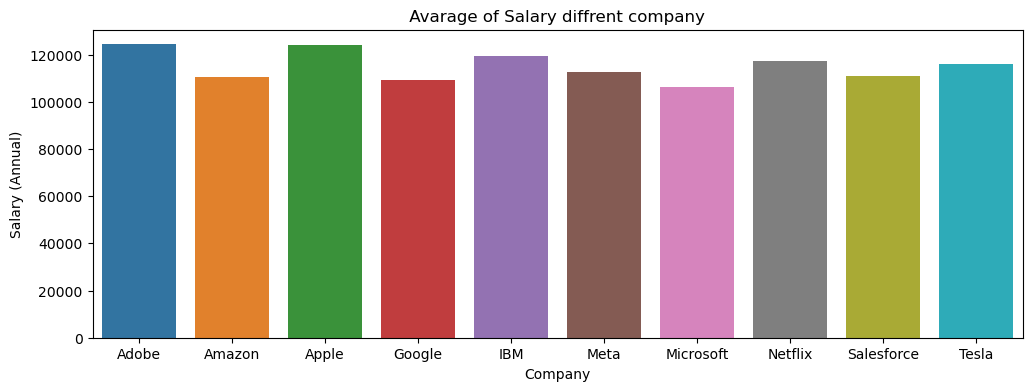

In [29]:
plt.figure(figsize=(12,4))
sns.barplot(x='Company', y='Salary (Annual)', data=com_salary)
plt.title(" Avarage of Salary diffrent company ")
plt.show()

In [30]:
com_expe=df.groupby('Experience Level')['Salary (Annual)'].mean().reset_index()

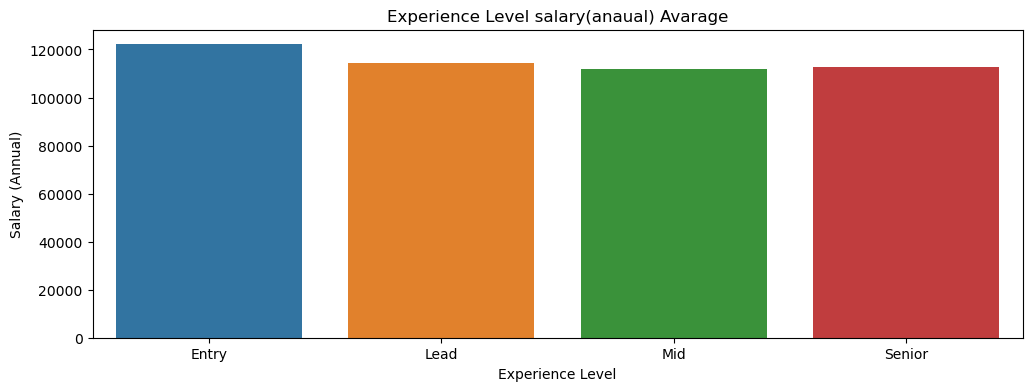

In [31]:
plt.figure(figsize=(12,4))
sns.barplot(x='Experience Level', y='Salary (Annual)', data=com_expe)
plt.title("Experience Level salary(anaual) Avarage")
plt.show()

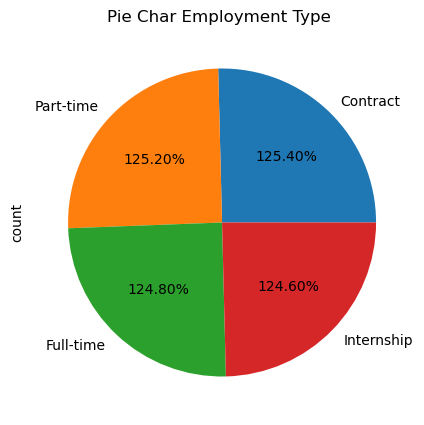

In [32]:
plt.figure(figsize=(12,5))
df['Employment Type'].value_counts().plot(kind='pie', autopct='1%.2f%%')
plt.title("Pie Char Employment Type ")
plt.show()

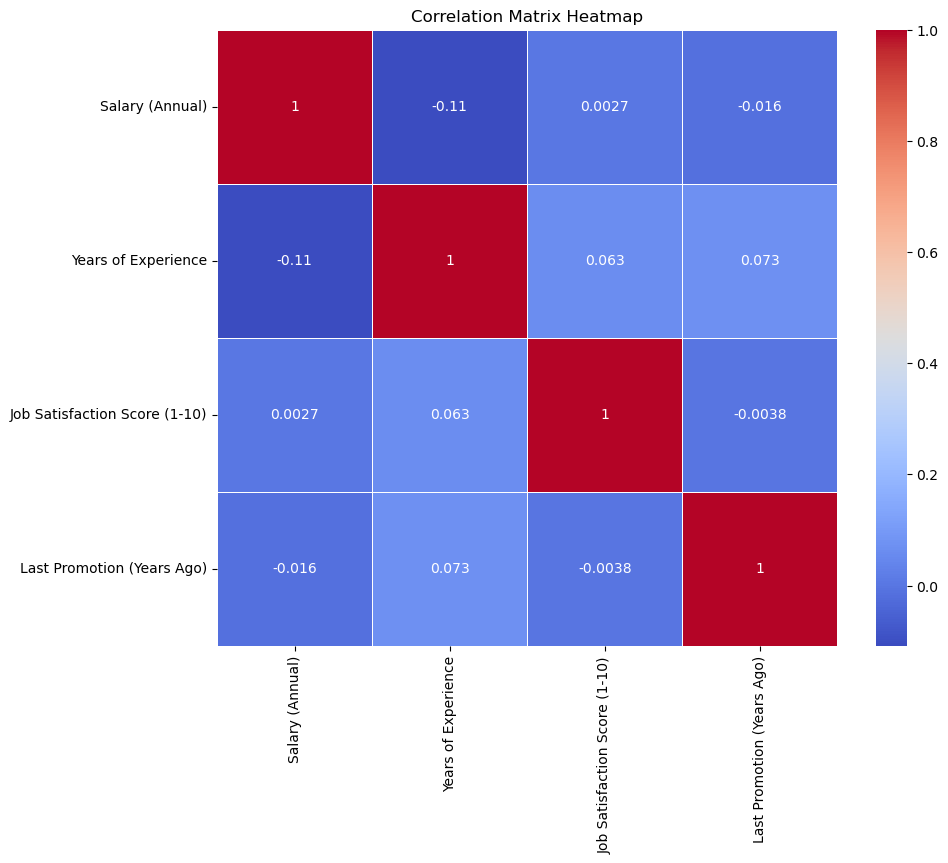

In [33]:
# Correlation Analysis (EDA) to understand relationships between numerical variables

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()